In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from benatools.ct import ct
from glob import glob
import os
import pydicom


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


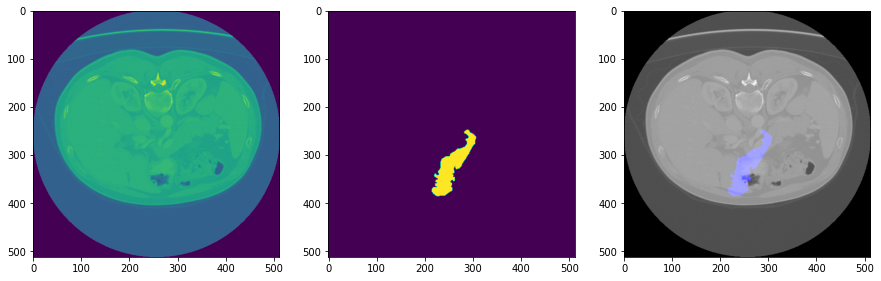

In [13]:
fig = plt.figure(figsize = (15,15))
slice_id = 100
case = '0008'

# Scan
x = pydicom.read_file(glob('data/Pancreas-CT/PANCREAS_'+case+'/**/**/1-'+str(slice_id)+'.dcm')[0]).pixel_array
fig.add_subplot(1, 3, 1)
plt.imshow(x)

# Mask
nii_img  = nib.load('TCIA_pancreas_labels-02-05-2017/label'+case+'.nii.gz')
nii_data = nii_img.get_fdata()
mask = nii_data[:,:,slice_id]
fig.add_subplot(1, 3, 2)
plt.imshow(mask)


fig.add_subplot(1, 3, 3)
plt.imshow(np.stack([(x-x.min())/(x.max()-x.min()),(x-x.min())/(x.max()-x.min()),(x-x.min())/(x.max()-x.min())+mask*100], axis=2))
plt.show()



# !!! Mask does not seem to fit in the image. We need to find out the reason or the correct alignment